In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Resources/Final_new_draft.csv")
df
             

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61066,61066,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61067,61067,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,...,0.0000,0.0000,0.0000,C,0.00000,NaN,NaN,NaN,NaN,NaN
61068,61068,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61069,61069,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN


In [3]:
#draftstatus= df['draft_status']
#draftstatus.replace["Undrafted" : 0, inplace=True]
#draftstatus.replace["Drafted" : 1, ]

In [3]:
df.loc[df['draft_status'] == "Undrafted", 'draft_status'] = 0
df.loc[df['draft_status'] == "Drafted", 'draft_status'] = 1
df['draft_status'].head(78)

0     0
1     0
2     0
3     0
4     0
     ..
73    1
74    1
75    1
76    0
77    0
Name: draft_status, Length: 78, dtype: object

In [5]:
#newdf = df['draft_status'].astype(int)
#newdf.dtypes

In [4]:
droppedstats =df.dropna(axis=0, subset=["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"])
droppedstats

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61058,61058,Jordan Nesbitt,Memphis,Amer,3,1.0,50.3,30.1,37.5,37.50,...,0.0000,0.0000,1.0000,Stretch 4,15.41270,NaN,NaN,NaN,NaN,NaN
61059,61059,Quinn Pemberton,Boston College,ACC,2,0.9,0.0,13.8,0.0,0.00,...,0.0000,0.0000,0.0000,Combo G,7.69879,NaN,NaN,NaN,NaN,NaN
61060,61060,Mac Etienne,UCLA,P12,13,11.0,99.1,15.1,60.0,55.37,...,0.1538,0.1538,2.6154,C,0.00000,NaN,NaN,NaN,NaN,NaN
61062,61062,Lysander Rehnstrom,George Mason,A10,2,0.3,0.0,32.2,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,22.22830,NaN,NaN,NaN,NaN,NaN


In [5]:
droppedstats["draft_status"].value_counts()


0    54900
1     1444
Name: draft_status, dtype: int64

In [6]:
newdf = droppedstats['draft_status'].astype(int)
#newdf

In [7]:
stats = ["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"]
X = droppedstats[stats]
y= newdf

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [15]:
# fit the model to the data
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
# print the accuracy score for the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9743243882815088
Testing Data Score: 0.9733778219508732


In [18]:
# make predictions by using X_test and y_test data
predictions = classifier.predict(X_test_scaled)
print(f"First 25 Predictions: {predictions[:25].tolist()}")
print(f"First 25 Actual Labels: {y_test[:25].tolist()}")

First 25 Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 25 Actual Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[13696,    15],
       [  360,    15]], dtype=int64)

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
accuracy = (tp+tn) / (tp+fp+tn+fn)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9733778219508732


In [21]:
# find sensitivity of model
sensitivity = tp / (tp+fn)
print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.04


In [22]:
# find precision of model
precision = tp / (tp+fp)
print(f"Precision: {precision}")

Precision: 0.5


In [23]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13711
           1       0.50      0.04      0.07       375

    accuracy                           0.97     14086
   macro avg       0.74      0.52      0.53     14086
weighted avg       0.96      0.97      0.96     14086



In [25]:
rcf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
score1= rcf.score(X_train_scaled, y_train)
score2 =rcf.score(X_test_scaled, y_test)
print(score1)


1.0


In [26]:
print(score2)

0.9734488144256709


In [27]:
# make predictions
pred_rcf = rcf.predict(X_test_scaled)
print(f"First 25 Predictions: {pred_rcf[:25].tolist()}")
print(f"First 25 Actual Labels: {y_test[:25].tolist()}")

First 25 Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 25 Actual Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
# confusion matrix
confusion_matrix(y_test, pred_rcf)

array([[13700,    11],
       [  363,    12]], dtype=int64)

In [29]:
# classification report
print(classification_report(y_test, pred_rcf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13711
           1       0.52      0.03      0.06       375

    accuracy                           0.97     14086
   macro avg       0.75      0.52      0.52     14086
weighted avg       0.96      0.97      0.96     14086



In [30]:
# trying new stats to get better predictions
stats2 = ["pts", "blk"]
X2 = droppedstats[stats2]
y2 = newdf

In [31]:
# train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)
scaler2 = StandardScaler().fit(X2_train)
X2_train_scaled = scaler2.transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [32]:
# create a logistic regression model
classifier2 = LogisticRegression()
classifier2

LogisticRegression()

In [38]:
# fit the model to the data
classifier2.fit(X_train, y_train)

C:\Users\jlsin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# confusion matrix for logistic regression new stats
predictions2 = classifier2.predict(X_test)
confusion_matrix(y_test, predictions2)

array([[13696,    15],
       [  359,    16]], dtype=int64)

In [40]:
# classification report for logistic regression with new stats
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13711
           1       0.52      0.04      0.08       375

    accuracy                           0.97     14086
   macro avg       0.75      0.52      0.53     14086
weighted avg       0.96      0.97      0.96     14086



New set of stats:

In [64]:
droppedstats2 =df.dropna(axis=0, subset=["Min_per", "ORB_per", "DRB_per", "AST_per", "stl_per", "blk_per", "TO_per", "twoP_per", "TP_per", "FT_per", "eFG", "porpag", "adjoe"])
droppedstats2

,Unnamed: 0,player_name,team_x,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,stl,blk,pts,Unnamed: 64,Unnamed: 65,nba team,team_y,year_y,ROUND NUMBER,ROUND PICK
0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,...,0.3462,0.0385,3.8846,NaN,6.22026,NaN,NaN,NaN,NaN,NaN
1,1,DeAndrae Ross,Troy,SB,7,11.5,67.1,16.9,34.5,36.11,...,0.1429,0.0000,3.2857,Wing G,7.67089,NaN,NaN,NaN,NaN,NaN
2,2,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,...,0.4118,0.2353,5.9412,NaN,3.94375,NaN,NaN,NaN,NaN,NaN
3,3,Pooh Williams,Utah St.,WAC,32,64.0,108.3,18.1,53.0,53.33,...,0.5938,0.2188,8.7812,Combo G,7.30085,NaN,NaN,NaN,NaN,NaN
4,4,Pooh Williams,Utah St.,WAC,33,64.5,105.6,18.7,48.1,52.40,...,0.2121,0.0909,8.6667,Combo G,9.66297,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61066,61066,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61067,61067,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,...,0.0000,0.0000,0.0000,C,0.00000,NaN,NaN,NaN,NaN,NaN
61068,61068,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN
61069,61069,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,...,0.0000,0.0000,0.0000,PF/C,0.00000,NaN,NaN,NaN,NaN,NaN


In [65]:
newdf2 = droppedstats2['draft_status'].astype(int)
#newdf

In [66]:
# trying new stats to get better predictions
stats3 = ["Min_per", "ORB_per", "DRB_per", "AST_per", "stl_per", "blk_per", "TO_per", "twoP_per", "TP_per", "FT_per", "eFG", "porpag", "adjoe"]
X3 = droppedstats2[stats3]
y3 = newdf2

In [67]:
# train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=1)
scaler3 = StandardScaler().fit(X3_train)
X3_train_scaled = scaler3.transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

In [68]:
# create a logistic regression model
classifier3 = LogisticRegression()
classifier3

LogisticRegression()

In [69]:
# fit the model to the data
classifier3.fit(X3_train_scaled, y3_train)

LogisticRegression()

In [70]:
# confusion matrix for logistic regression new stats
predictions3 = classifier3.predict(X3_test_scaled)
confusion_matrix(y3_test, predictions3)

array([[14887,    24],
       [  319,    38]], dtype=int64)

In [71]:
# classification report for logistic regression with new stats
print(classification_report(y3_test, predictions3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.61      0.11      0.18       357

    accuracy                           0.98     15268
   macro avg       0.80      0.55      0.58     15268
weighted avg       0.97      0.98      0.97     15268



In [72]:
# fit to random forest
rcf2 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X3_train_scaled, y3_train)

In [73]:
# confusion matrix for random forest new stats3
pred_rcf2 = rcf2.predict(X3_test_scaled)
confusion_matrix(y3_test, pred_rcf2)

array([[14888,    23],
       [  300,    57]], dtype=int64)

In [74]:
# classification report for rcf2 with new stats3
print(classification_report(y3_test, pred_rcf2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.71      0.16      0.26       357

    accuracy                           0.98     15268
   macro avg       0.85      0.58      0.63     15268
weighted avg       0.97      0.98      0.97     15268



[0.07879231 0.05985564 0.06408475 0.06412499 0.05537504 0.08068429
 0.06808029 0.06407932 0.05205935 0.06966499 0.06308108 0.15434243
 0.1257755 ]


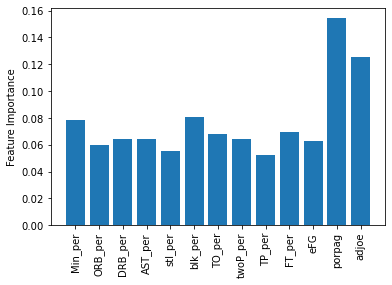

In [75]:
features2 = rcf2.feature_importances_
#xlabels = ["PointsPerGame", "TotalRebounds", "Assists", "Steals", "Blocks", "Assist/TO Ratio", "MinutesPlayedPerGame","FTPercentage", "EffectiveFeildGoalPercentage"]
print(features2)
plt.bar(x=range(len(features2)), height=features2)
plt.xticks(np.arange(13), ["Min_per", "ORB_per", "DRB_per", "AST_per", "stl_per", "blk_per", "TO_per", "twoP_per", "TP_per", "FT_per", "eFG", "porpag", "adjoe"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

In [98]:
# trying new stats to get better predictions (stats4)
stats4 = ["Min_per", "Ortg", "AST_per", "blk_per", "TO_per", "twoP_per", "TP_per", "FT_per", "eFG", "porpag", "adjoe"]
X4 = droppedstats2[stats4]
y4 = newdf2

In [99]:
# train test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=1)
scaler4 = StandardScaler().fit(X4_train)
X4_train_scaled = scaler4.transform(X4_train)
X4_test_scaled = scaler4.transform(X4_test)

In [100]:
# create a logistic regression model
classifier4 = LogisticRegression()
classifier4

LogisticRegression()

In [101]:
# fit the model to the data
classifier4.fit(X4_train_scaled, y4_train)

LogisticRegression()

In [102]:
# confusion matrix for logistic regression new stats
predictions4 = classifier4.predict(X4_test_scaled)
confusion_matrix(y4_test, predictions4)

array([[14888,    23],
       [  314,    43]], dtype=int64)

In [103]:
# classification report for logistic regression with new stats
print(classification_report(y4_test, predictions4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.65      0.12      0.20       357

    accuracy                           0.98     15268
   macro avg       0.82      0.56      0.60     15268
weighted avg       0.97      0.98      0.97     15268



In [104]:
# fit to random forest
rcf3 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X4_train_scaled, y4_train)

In [105]:
# confusion matrix for random forest new stats4
pred_rcf3 = rcf3.predict(X4_test_scaled)
confusion_matrix(y4_test, pred_rcf3)

array([[14883,    28],
       [  297,    60]], dtype=int64)

In [106]:
# classification report for rcf2 with new stats4
print(classification_report(y4_test, pred_rcf3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.68      0.17      0.27       357

    accuracy                           0.98     15268
   macro avg       0.83      0.58      0.63     15268
weighted avg       0.97      0.98      0.97     15268



Try No. 5

In [107]:
# trying new stats to get better predictions (stats4)
stats5 = ["Min_per", "Ortg", "usg", "eFG", "TS_per", "AST_per", "blk_per", "TO_per", "FT_per", "eFG", "porpag", "adjoe"]
X5 = droppedstats2[stats5]
y5 = newdf2

In [108]:
# train test split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state=1)
scaler5 = StandardScaler().fit(X5_train)
X5_train_scaled = scaler5.transform(X5_train)
X5_test_scaled = scaler5.transform(X5_test)

In [109]:
# create a logistic regression model
classifier5 = LogisticRegression()
classifier5

LogisticRegression()

In [110]:
# fit the model to the data
classifier5.fit(X5_train_scaled, y5_train)

LogisticRegression()

In [111]:
# confusion matrix for logistic regression new stats
predictions5 = classifier5.predict(X5_test_scaled)
confusion_matrix(y5_test, predictions5)

array([[14886,    25],
       [  307,    50]], dtype=int64)

In [112]:
# classification report for logistic regression with new stats
print(classification_report(y5_test, predictions5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.67      0.14      0.23       357

    accuracy                           0.98     15268
   macro avg       0.82      0.57      0.61     15268
weighted avg       0.97      0.98      0.97     15268



In [113]:
# fit to random forest
rcf4 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X5_train_scaled, y5_train)

In [114]:
# confusion matrix for random forest new stats4
pred_rcf4 = rcf4.predict(X5_test_scaled)
confusion_matrix(y5_test, pred_rcf4)

array([[14890,    21],
       [  298,    59]], dtype=int64)

In [115]:
# classification report for rcf2 with new stats4
print(classification_report(y5_test, pred_rcf4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.74      0.17      0.27       357

    accuracy                           0.98     15268
   macro avg       0.86      0.58      0.63     15268
weighted avg       0.97      0.98      0.97     15268



Try No. 6

In [116]:
# trying new stats to get better predictions (stats4)
stats6 = ["GP", "Min_per", "Ortg", "usg", "eFG", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"]
X6 = droppedstats2[stats6]
y6 = newdf2

In [117]:
# train test split
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=1)
scaler6 = StandardScaler().fit(X6_train)
X6_train_scaled = scaler6.transform(X6_train)
X6_test_scaled = scaler6.transform(X6_test)

In [118]:
# create a logistic regression model
classifier6 = LogisticRegression()
classifier6

LogisticRegression()

In [119]:
# fit the model to the data
classifier6.fit(X6_train_scaled, y6_train)

LogisticRegression()

In [120]:
# confusion matrix for logistic regression new stats
predictions6 = classifier6.predict(X6_test_scaled)
confusion_matrix(y6_test, predictions6)

array([[14883,    28],
       [  298,    59]], dtype=int64)

In [121]:
# classification report for logistic regression with new stats
print(classification_report(y6_test, predictions6))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.68      0.17      0.27       357

    accuracy                           0.98     15268
   macro avg       0.83      0.58      0.63     15268
weighted avg       0.97      0.98      0.97     15268



In [122]:
# fit to random forest
rcf5 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X6_train_scaled, y6_train)

In [123]:
# confusion matrix for random forest new stats4
pred_rcf5 = rcf5.predict(X6_test_scaled)
confusion_matrix(y6_test, pred_rcf5)

array([[14889,    22],
       [  293,    64]], dtype=int64)

In [124]:
# classification report for rcf2 with new stats4
print(classification_report(y6_test, pred_rcf5))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.74      0.18      0.29       357

    accuracy                           0.98     15268
   macro avg       0.86      0.59      0.64     15268
weighted avg       0.98      0.98      0.97     15268



[0.08879876 0.07780834 0.07164995 0.06841605 0.06116081 0.07054674
 0.06698306 0.06837372 0.0851268  0.07087552 0.14880659 0.12145365]


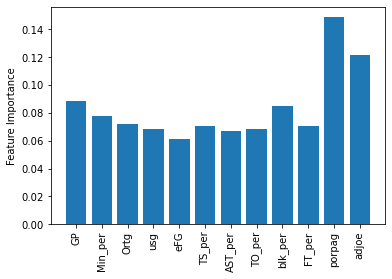

In [125]:
features3 = rcf5.feature_importances_
#xlabels = ["PointsPerGame", "TotalRebounds", "Assists", "Steals", "Blocks", "Assist/TO Ratio", "MinutesPlayedPerGame","FTPercentage", "EffectiveFeildGoalPercentage"]
print(features3)
plt.bar(x=range(len(features3)), height=features3)
plt.xticks(np.arange(12), ["GP", "Min_per", "Ortg", "usg", "eFG", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

Try No. 7

In [136]:
# trying new stats to get better predictions (stats4)
stats7 = ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"]
X7 = droppedstats2[stats7]
y7 = newdf2

In [137]:
# train test split
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state=1)
scaler7 = StandardScaler().fit(X7_train)
X7_train_scaled = scaler7.transform(X7_train)
X7_test_scaled = scaler7.transform(X7_test)

In [138]:
# create a logistic regression model
classifier7 = LogisticRegression()
classifier7

LogisticRegression()

In [139]:
# fit the model to the data
classifier7.fit(X7_train_scaled, y7_train)

LogisticRegression()

In [140]:
# confusion matrix for logistic regression new stats
predictions7 = classifier7.predict(X7_test_scaled)
confusion_matrix(y7_test, predictions7)

array([[14885,    26],
       [  299,    58]], dtype=int64)

In [141]:
# classification report for logistic regression with new stats
print(classification_report(y7_test, predictions7))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.69      0.16      0.26       357

    accuracy                           0.98     15268
   macro avg       0.84      0.58      0.63     15268
weighted avg       0.97      0.98      0.97     15268



In [142]:
# fit to random forest
rcf6 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X7_train_scaled, y7_train)

In [143]:
# confusion matrix for random forest new stats4
pred_rcf6 = rcf6.predict(X7_test_scaled)
confusion_matrix(y7_test, pred_rcf6)

array([[14880,    31],
       [  285,    72]], dtype=int64)

In [144]:
# classification report for rcf2 with new stats4
print(classification_report(y7_test, pred_rcf6))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.70      0.20      0.31       357

    accuracy                           0.98     15268
   macro avg       0.84      0.60      0.65     15268
weighted avg       0.97      0.98      0.97     15268



[0.09375669 0.08972434 0.08315478 0.0858843  0.07883422 0.08127901
 0.09615611 0.08298512 0.17198087 0.13624455]


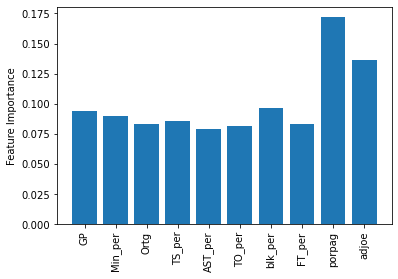

In [145]:
features4 = rcf6.feature_importances_
print(features4)
plt.bar(x=range(len(features4)), height=features4)
plt.xticks(np.arange(10), ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "FT_per", "porpag", "adjoe"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

Try No. 8

In [157]:
# trying new stats to get better predictions (stats4)
stats8 = ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "porpag", "adjoe"]
X8 = droppedstats2[stats8]
y8 = newdf2

In [158]:
# train test split
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, random_state=1)
scaler8 = StandardScaler().fit(X8_train)
X8_train_scaled = scaler8.transform(X8_train)
X8_test_scaled = scaler8.transform(X8_test)

In [159]:
# create a logistic regression model
classifier8 = LogisticRegression()
classifier8

LogisticRegression()

In [160]:
# fit the model to the data
classifier8.fit(X8_train_scaled, y8_train)

LogisticRegression()

In [161]:
# confusion matrix for logistic regression new stats
predictions8 = classifier8.predict(X8_test_scaled)
confusion_matrix(y8_test, predictions8)

array([[14882,    29],
       [  301,    56]], dtype=int64)

In [162]:
# classification report for logistic regression with new stats
print(classification_report(y8_test, predictions8))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.66      0.16      0.25       357

    accuracy                           0.98     15268
   macro avg       0.82      0.58      0.62     15268
weighted avg       0.97      0.98      0.97     15268



In [163]:
# fit to random forest
rcf7 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X8_train_scaled, y8_train)

In [164]:
# confusion matrix for random forest new stats4
pred_rcf7 = rcf7.predict(X8_test_scaled)
confusion_matrix(y8_test, pred_rcf7)

array([[14883,    28],
       [  289,    68]], dtype=int64)

In [165]:
# classification report for rcf2 with new stats4
print(classification_report(y8_test, pred_rcf7))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14911
           1       0.71      0.19      0.30       357

    accuracy                           0.98     15268
   macro avg       0.84      0.59      0.64     15268
weighted avg       0.97      0.98      0.97     15268



[0.09810147 0.09864126 0.09078694 0.09591233 0.08928574 0.08982228
 0.10703182 0.18335771 0.14706045]


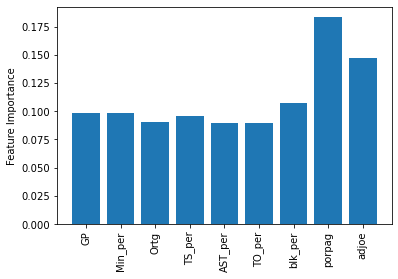

In [166]:
features5 = rcf7.feature_importances_
print(features5)
plt.bar(x=range(len(features5)), height=features5)
plt.xticks(np.arange(9), ["GP", "Min_per", "Ortg", "TS_per", "AST_per", "TO_per", "blk_per", "porpag", "adjoe"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

[0.14141608 0.11194565 0.10291005 0.10003782 0.12802042 0.11168157
 0.11218158 0.09432056 0.09748627]


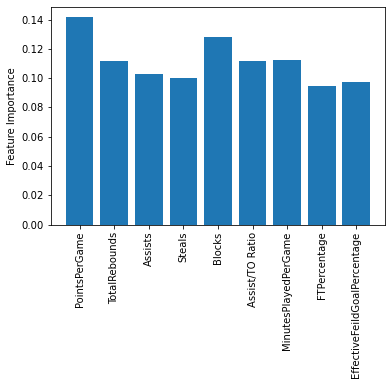

In [13]:
features = rcf.feature_importances_
#xlabels = ["PointsPerGame", "TotalRebounds", "Assists", "Steals", "Blocks", "Assist/TO Ratio", "MinutesPlayedPerGame","FTPercentage", "EffectiveFeildGoalPercentage"]
print(features)
plt.bar(x=range(len(features)), height=features)
plt.xticks(np.arange(9), ["PointsPerGame", "TotalRebounds", "Assists", "Steals", "Blocks", "Assist/TO Ratio", "MinutesPlayedPerGame","FTPercentage", "EffectiveFeildGoalPercentage"], rotation=90)

plt.ylabel("Feature Importance")
plt.show()

In [14]:
fresh = df.loc[df['yr']=="Fr"]
soph = df.loc[df['yr']=="So"]
junior = df.loc[df['yr']=="Jr"]
senior = df.loc[df['yr']=="Sr"]

In [15]:
testingfilepath = "Resources/Potential_Draft.csv"
potentialdraft_df= pd.read_csv(testingfilepath)
potentialdraft_df.head()



,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430


In [16]:
potentialdraft_df["draft_status"]

0       Undrafted
1       Undrafted
2       Undrafted
3       Undrafted
4       Undrafted
          ...    
3973    Undrafted
3974    Undrafted
3975    Undrafted
3976    Undrafted
3977    Undrafted
Name: draft_status, Length: 3978, dtype: object

In [17]:
potentialdraft_df.loc[df['draft_status'] == "Undrafted", 'draft_status'] = 0
potentialdraft_df.loc[df['draft_status'] == "Drafted", 'draft_status'] = 1
potentialdraft_df['draft_status']

0       Undrafted
1       Undrafted
2       Undrafted
3       Undrafted
4       Undrafted
          ...    
3973    Undrafted
3974    Undrafted
3975    Undrafted
3976    Undrafted
3977    Undrafted
Name: draft_status, Length: 3978, dtype: object

In [18]:
predroppedstats =potentialdraft_df.dropna(axis=0, subset=["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"])
predroppedstats

,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,0,Isaiah Felder,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,...,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,Wing G,12.226400
1,1,Jalen Coleman-Lands,Kansas,B12,23,78.5,103.1,21.5,54.0,56.12,...,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,Wing G,11.095900
2,2,K.J. Walton,Akron,MAC,20,63.0,108.6,26.5,54.3,58.88,...,-0.335789,2.3500,3.5500,5.9000,1.1500,1.2500,0.2000,16.3500,Wing G,0.284581
3,3,Jeriah Horne,Tulsa,Amer,32,61.3,116.0,20.8,55.2,58.61,...,1.721580,1.1250,4.7188,5.8438,0.9062,0.5938,0.0625,10.8125,Stretch 4,10.140700
4,4,Eric Curry,Minnesota,B10,29,39.2,95.1,14.7,46.3,48.72,...,2.746770,1.1034,1.9655,3.0690,0.8276,0.8276,0.2414,3.6552,Wing F,2.562430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,3956,Mac Etienne,UCLA,P12,13,11.0,99.1,15.1,60.0,55.37,...,0.799673,0.9231,1.9231,2.8462,0.2308,0.1538,0.1538,2.6154,C,0.000000
3957,3957,Ryan Woods,Arkansas Pine Bluff,SWAC,7,2.8,90.1,14.7,70.0,58.82,...,1.929770,0.0000,0.0000,0.0000,0.2857,0.4286,0.0000,1.0000,Pure PG,4.113400
3959,3959,Lysander Rehnstrom,Navy,Pat,2,0.3,0.0,32.2,0.0,0.00,...,-13.826600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,22.228300
3960,3960,Trey James,Iona,MAAC,2,0.8,45.9,29.9,0.0,52.63,...,-5.286060,0.5000,0.5000,1.0000,0.0000,0.0000,0.0000,0.5000,C,0.000000


In [19]:
Output = pd.DataFrame({"Player Name": predroppedstats.player_name, "Drafted?": draftpredictions})
Output["Drafted?"].value_counts()

NameError: name 'draftpredictions' is not defined

In [20]:
stats = ["pts", "treb", "ast", "stl", "blk","ast/tov", "mp", "FT_per", "eFG"]
X_test= predroppedstats[stats]
draftpredictions = rcf.predict_proba(X_test)
draftpredictions


array([[0.782, 0.218],
       [0.48 , 0.52 ],
       [0.472, 0.528],
       ...,
       [0.992, 0.008],
       [0.986, 0.014],
       [0.982, 0.018]])

In [21]:
listed = draftpredictions.tolist()

In [28]:
Output = pd.DataFrame(draftpredictions, columns=["Yesdraft","Nodraft"])
Output["Player"] = predroppedstats["player_name"]
Output

,Yesdraft,Nodraft,Player
0,0.782,0.218,Isaiah Felder
1,0.480,0.520,Jalen Coleman-Lands
2,0.472,0.528,K.J. Walton
3,0.462,0.538,Jeriah Horne
4,0.512,0.488,Eric Curry
...,...,...,...
3395,0.724,0.276,Noah Hupmann
3396,0.610,0.390,Zach Anderson
3397,0.992,0.008,Nate Johnson
3398,0.986,0.014,Jake Evans


In [23]:
#Output_V= Output["Yesdraft"].astype(int)
#Output_M= Output["Nodraft"].astype(int)
#Output["Yesdraft"] = Output_V
#Output["Nodraft"] = Output_M
#Output.dtypes

Yesdraft     int32
Nodraft      int32
Player      object
dtype: object

In [29]:
Output

,Yesdraft,Nodraft,Player
0,0.782,0.218,Isaiah Felder
1,0.480,0.520,Jalen Coleman-Lands
2,0.472,0.528,K.J. Walton
3,0.462,0.538,Jeriah Horne
4,0.512,0.488,Eric Curry
...,...,...,...
3395,0.724,0.276,Noah Hupmann
3396,0.610,0.390,Zach Anderson
3397,0.992,0.008,Nate Johnson
3398,0.986,0.014,Jake Evans


<AxesSubplot:>

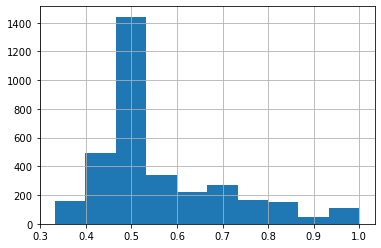

In [25]:
pd.Series(rcf.predict_proba(X_test)[:,0]).hist()

In [30]:
Output.to_csv("DraftProbabilities.csv")

In [37]:
#0.97 yields us approximately 60(ish) drafted players 
(Output["Yesdraft"] > 0.97).value_counts()

False    3333
True       67
Name: Yesdraft, dtype: int64

In [ ]:
pd.Series(draftpredictions).value_counts()

<AxesSubplot:>

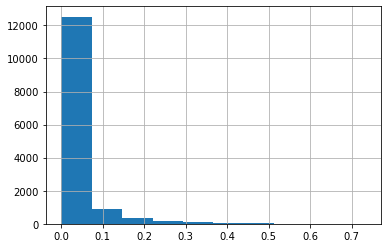

In [38]:
#Precission Recall Curve
pd.Series(rcf.predict_proba(X_test_scaled)[:,1]).hist()


In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(X_test, draftpredictions)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


ValueError: continuous-multioutput format is not supported

In [ ]:
X_test